In [5]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [46]:
#Loading data
data = pd.read_csv("../Data/bitcoin.csv") 
df = data.copy()
df.Datetime = pd.to_datetime(df.Datetime)
df['Datetime'] = df['Datetime'].dt.tz_localize(None)
df.set_index(df.Datetime, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2023-04-02 08:00:00 to 2023-04-02 09:55:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Datetime   24 non-null     datetime64[ns]
 1   Open       24 non-null     float64       
 2   High       24 non-null     float64       
 3   Low        24 non-null     float64       
 4   Close      24 non-null     float64       
 5   Adj Close  24 non-null     float64       
 6   Volume     24 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.5 KB


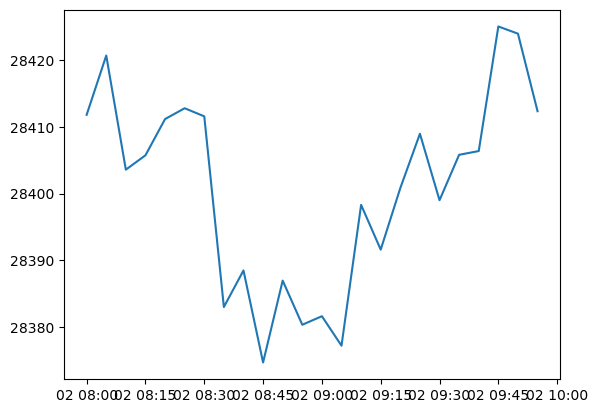

In [47]:
plt.plot(df.Close)
plt.show()

In [81]:
# to confirm preform adf test
from statsmodels.tsa.stattools import adfuller
def test_stationariy(series):
    result = adfuller(series)
    print('adf statistics = ',result[0],'\np value =',round(result[1],4))


In [82]:
test_stationariy(df['Close'])

adf statistics =  -1.4673017177510315 
p value = 0.5496


## Prophet

In [60]:
df2 = pd.DataFrame({'y':df['Close'], 'ds': df.index})

In [61]:
df2.head()

,y,ds
Datetime,,
2023-04-02 08:00:00,28411.789062,2023-04-02 08:00:00
2023-04-02 08:05:00,28420.660156,2023-04-02 08:05:00
2023-04-02 08:10:00,28403.578125,2023-04-02 08:10:00
2023-04-02 08:15:00,28405.724609,2023-04-02 08:15:00
2023-04-02 08:20:00,28411.152344,2023-04-02 08:20:00


In [62]:
# splitting the data to train test
train = df2[:19]
test = df2[19:]

In [63]:
# Now lets predic with the model
start_date = test.index[0]
end_date = test.index[-1]
prophet_model = Prophet()
prophet_model.fit(train)

12:28:46 - cmdstanpy - INFO - Chain [1] start processing
12:28:46 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
forecast_date = prophet_model.make_future_dataframe(periods=5,freq='5min')
prophet_predict = prophet_model.predict(forecast_date)

In [76]:
forecast_date

,ds
0,2023-04-02 08:00:00
1,2023-04-02 08:05:00
2,2023-04-02 08:10:00
3,2023-04-02 08:15:00
4,2023-04-02 08:20:00
5,2023-04-02 08:25:00
6,2023-04-02 08:30:00
7,2023-04-02 08:35:00
8,2023-04-02 08:40:00
9,2023-04-02 08:45:00


In [77]:
pred_prof = prophet_predict[['yhat','ds']][19:]
pred_prof.set_index('ds',inplace=True)

<Axes: xlabel='ds'>

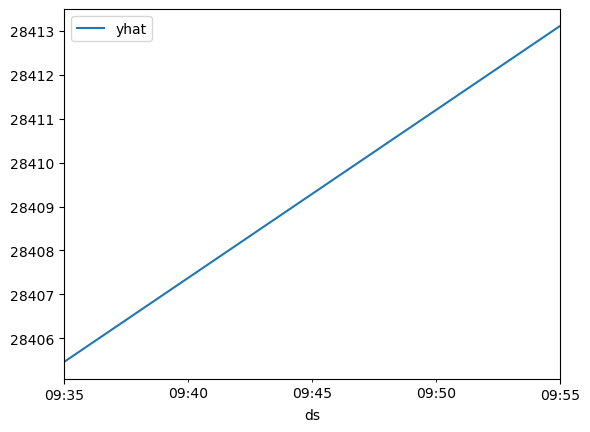

In [78]:
pred_prof.plot()

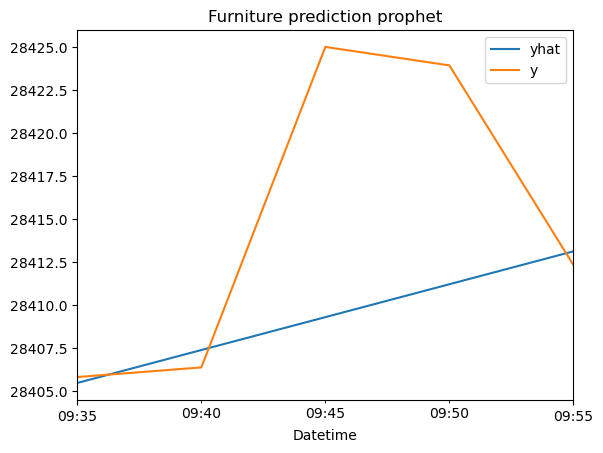

In [79]:
pred_prof.plot()
test['y'].plot()
plt.title("Furniture prediction prophet")
plt.legend()

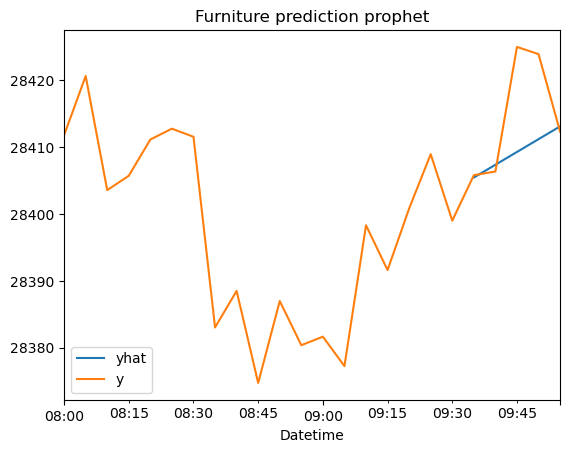

In [80]:
pred_prof.plot()
df2['y'].plot()
plt.title("Furniture prediction prophet")
plt.legend()

## arima

In [83]:

from pmdarima import auto_arima
order = auto_arima(train['y'],trace=True,max_order = None)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=158.513, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=157.128, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=149.250, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=153.700, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=445.574, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=150.541, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=150.935, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=151.928, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.837 seconds


In [93]:
model = ARIMA(train['y'],order=(1, 0, 0))

c:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
c:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
c:\Users\vasee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)


In [94]:
arima_model = model.fit()

In [96]:
start_date = test.index[0]
end_date = test.index[-1]
pred_arima = arima_model.predict(start = start_date, end = end_date)

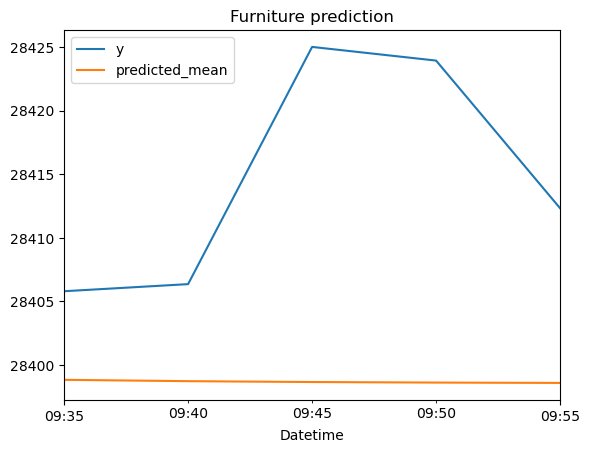

In [97]:
test['y'].plot()
pred_arima.plot()
plt.title("Furniture prediction")
plt.legend()
